# Testing Entanglement Measures on a Random Clifford State

This notebook is used to document tests of entanglement measures (in `Measurements.jl`) on a random Clifford state.


In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("../AdditionalStructure/NewTypes.jl")
include("../AdditionalStructure/BitStringOps.jl")
include("../AdditionalStructure/Measurements.jl")
include("../AdditionalStructure/MICModels.jl")
include("../AdditionalStructure/ModelRuns.jl")
include("../AdditionalStructure/HelperTools.jl")
include("../AdditionalStructure/Iterators.jl");

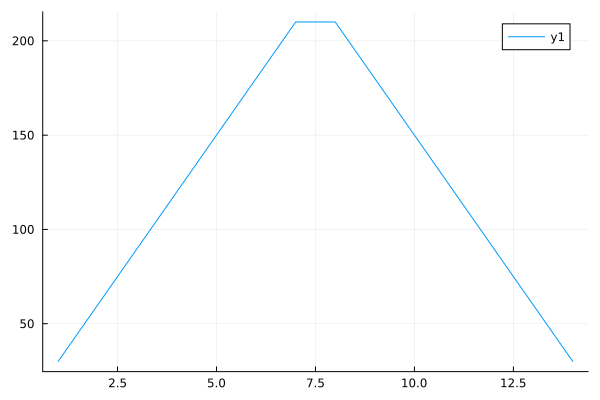

In [2]:
L = 15
d = 3
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d)
state = MixedDestabilizer(random_stabilizer(system.nbits))

n_subdiv = 11
subdiv_array = []
for i_sub in 1:(n_subdiv - 1)
    push!(subdiv_array, round(Int, system.L * i_sub / n_subdiv))
end
subdiv_array = Integer.(subdiv_array)

ee_array = entanglement_entropy_cut(state, system, n_subdiv)
plot(subdiv_array, ee_array)

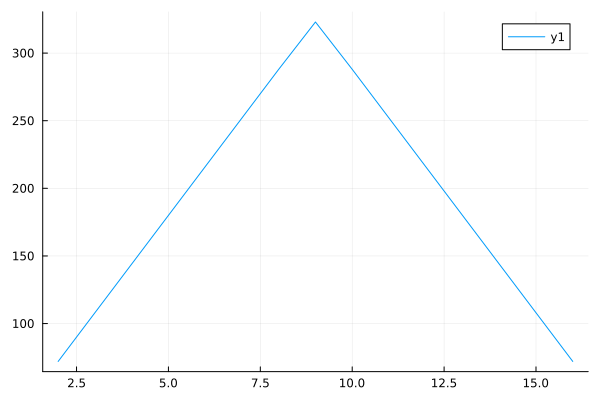

In [3]:
L = 18
d = 3
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d)
state = MixedDestabilizer(random_stabilizer(system.nbits))

n_subdiv = 12
subdiv_array = []
for i_sub in 1:(n_subdiv - 1)
    push!(subdiv_array, round(Int, system.L * i_sub / n_subdiv))
end
subdiv_array = Integer.(subdiv_array)

ee_array = entanglement_entropy_cut(state, system, n_subdiv)
plot(subdiv_array, ee_array)

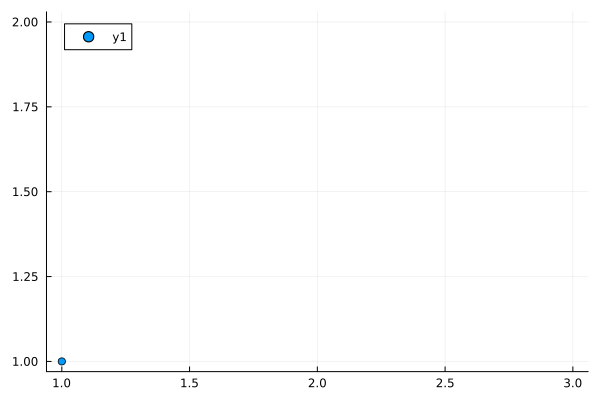

In [4]:
using Missings # for missing values

a = missings(Int, 3)  # 3 missing values
a[1] = 1
b = [1, 2, 3]
scatter(b, a)

In [5]:
c = missings(Float64, 3, 2, 2)
c[1, 1, :] = [1, 2]
c

3×2×2 Array{Union{Missing, Float64}, 3}:
[:, :, 1] =
 1.0       missing
  missing  missing
  missing  missing

[:, :, 2] =
 2.0       missing
  missing  missing
  missing  missing

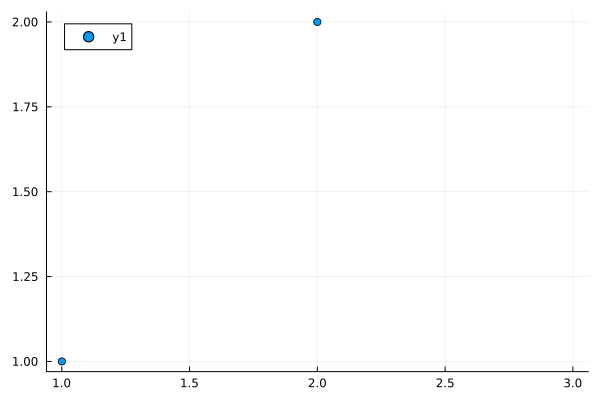

In [6]:
a = fill(NaN, 3)
b = [1, 2, 3]
a[1] = 1
a[2] = 2

scatter(b, a)

In [7]:
typeof(a)

Vector{Float64} (alias for Array{Float64, 1})

In [8]:
t_mmt = get_t_mmt_arr_simple(1000, 3)

3-element Vector{Int64}:
    1
   32
 1000

In [9]:
t_mmt = get_t_mmt_arr_refined(1000000, 9)

13-element Vector{Int64}:
       1
       6
      32
     178
    1000
    5623
   31623
  177828
  355656
  533484
  711312
  889140
 1000000

In [10]:
sqrt(1000)

31.622776601683793

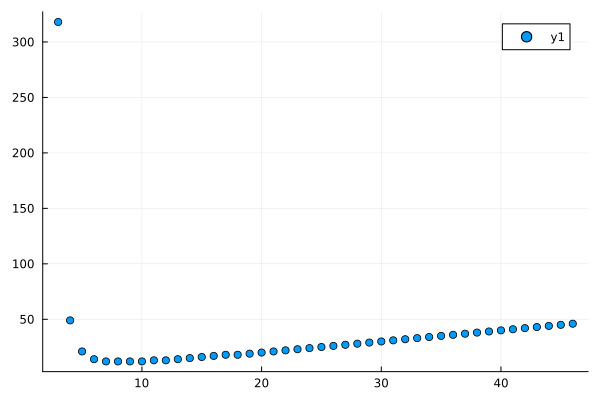

In [11]:
N = round(Int, 1e5)
a = 3:round(Int,N^(1/3))
b = [(length(get_t_mmt_arr_refined(N, i))) for i in a]
scatter(a,b)

In [12]:
get_t_mmt_arr_refined(100000, 6)

14-element Vector{Int64}:
      1
     10
    100
   1000
  10000
  20000
  30000
  40000
  50000
  60000
  70000
  80000
  90000
 100000

In [13]:
get_t_mmt_arr_refined(20000, 5)

15-element Vector{Int64}:
     1
    12
   141
  1682
  3364
  5046
  6728
  8410
 10092
 11774
 13456
 15138
 16820
 18502
 20000